**# Statistical methods: Using simple statistical measures such as mean, median, standard deviation, and interquartile ranges. For example, points that are more than three standard deviations from the mean could be considered anomalies.**

Statistical Anomalies found: [37.21707166154281, 45.79048201135034, 46.08536923625161, 148.49735759289774, 45.027886167366404, 142.9764784633872, 146.70160754395084, 142.71899829508905, 146.88572833366047, 151.36720840604477, 142.52716056375473, 58.32794929214559, 55.624580890949204, 142.03039768940488, 58.027881044001205, 154.8332324043519, 141.0818477813143]
Isolation Forest Anomalies found: [ 60.84116805  61.45104141  71.77083936  72.04798034  37.21707166
 128.19764895  45.79048201 125.19401899 129.68937244 126.26370603
  46.08536924  68.45704092 122.89624011  68.90765666  74.45933276
  73.27562466  74.69786651  63.84509942  71.49231244 148.49735759
 125.89771475  45.02788617 129.29831226  69.12470932 122.80000334
 137.10410909 127.2055012  127.11746167  61.20078874  71.37013536
 142.97647846 126.62882616 146.70160754 138.23082175 125.32307144
  74.25297941  72.49652314 131.9709814  142.7189983  139.35149302
 146.88572833 151.36720841 127.75849421  67.63636106 142.52716056
 131.9230

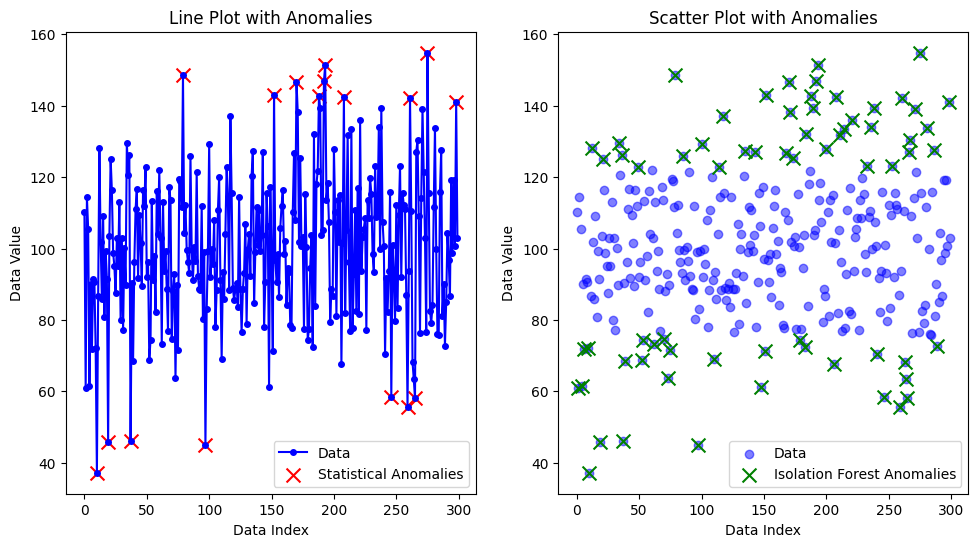

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

class AnomalyDetector:
    def __init__(self, threshold=3):

        self.threshold = threshold
        self.mean = None
        self.std_dev = None
        self.model = IsolationForest(n_estimators=100, contamination='auto')

    def fit(self, data):
        try:
            self.mean = np.mean(data)
            self.std_dev = np.std(data)
            # Normalize data for Isolation Forest
            scaled_data = StandardScaler().fit_transform(data.reshape(-1, 1))
            self.model.fit(scaled_data)
            logging.info("Models trained successfully with mean: {:.2f} and std_dev: {:.2f}".format(self.mean, self.std_dev))
        except Exception as e:
            logging.error("Failed to train models: {}".format(e))
            raise

    def detect(self, data):
        if self.mean is None or self.std_dev is None:
            raise RuntimeError("Models have not been trained. Call 'fit' with training data first.")

        try:
            scaled_data = StandardScaler().fit_transform(data.reshape(-1, 1))
            # Statistical detection
            statistical_anomalies = [x for x in data if abs(x - self.mean) > self.threshold * self.std_dev]
            # Isolation Forest detection
            isoforest_preds = self.model.predict(scaled_data)
            isoforest_anomalies = data[isoforest_preds == -1]
            logging.info("Detected {} statistical anomalies and {} Isolation Forest anomalies".format(len(statistical_anomalies), len(isoforest_anomalies)))
            return statistical_anomalies, isoforest_anomalies
        except Exception as e:
            logging.error("Failed to detect anomalies: {}".format(e))
            raise

    def plot_results(self, data, statistical_anomalies, isoforest_anomalies):

        indices = list(range(len(data)))

        plt.figure(figsize=(18, 6))

        # Line plot with anomalies highlighted
        plt.subplot(1, 3, 1)
        plt.plot(indices, data, label='Data', linestyle='-', marker='o', markersize=4, color='blue')
        plt.scatter([indices[i] for i, val in enumerate(data) if val in statistical_anomalies],
                    statistical_anomalies, color='red', s=100, label='Statistical Anomalies', marker='x')
        plt.title('Line Plot with Anomalies')
        plt.xlabel('Data Index')
        plt.ylabel('Data Value')
        plt.legend()

        # Scatter plot
        plt.subplot(1, 3, 2)
        plt.scatter(indices, data, label='Data', color='blue', marker='o', alpha=0.5)
        plt.scatter([indices[i] for i, val in enumerate(data) if val in isoforest_anomalies],
                    isoforest_anomalies, color='green', s=100, label='Isolation Forest Anomalies', marker='x')
        plt.title('Scatter Plot with Anomalies')
        plt.xlabel('Data Index')
        plt.ylabel('Data Value')
        plt.legend()

# Usage
if __name__ == "__main__":
    data = np.random.randn(300) * 20 + 100  # Simulate some data
    detector = AnomalyDetector(threshold=2)
    detector.fit(data)
    statistical_anomalies, isoforest_anomalies = detector.detect(data)
    print("Statistical Anomalies found:", statistical_anomalies)
    print("Isolation Forest Anomalies found:", isoforest_anomalies)
    detector.plot_results(data, statistical_anomalies, isoforest_anomalies)
